In [28]:
# packages and initial data import

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import operator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans, SpectralClustering
import sqlalchemy as sa
import configparser
import category_encoders as ce
from sklearn import metrics, linear_model, tree, preprocessing, ensemble, svm
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, silhouette_score,\
                            roc_auc_score, precision_score, recall_score
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.neural_network import MLPClassifier
from datetime import datetime, timedelta
import warnings

pd.set_option('display.max_columns', None)
warnings.simplefilter('ignore')   #suppress warning messages 

training = pd.read_csv('Train_Churn.csv', header = 0)
testing = pd.read_csv('Test_Churn.csv', header = 0)

In [29]:
print(training.shape)
training.head(10)

(5282, 21)


,Customer Number,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0980-PVMRC,Female,0,Yes,Yes,40,No,No phone service,DSL,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,50.85,2036.55,No
1,4143-OOBWZ,Male,0,Yes,No,5,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,81.30,416.3,Yes
2,4890-VMUAV,Male,0,No,No,63,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,One year,No,Electronic check,71.50,4576.3,No
3,2908-ZTPNF,Female,0,No,No,36,No,No phone service,DSL,No,Yes,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),34.85,1267.2,No
4,4450-MDZFX,Male,0,Yes,Yes,60,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),74.35,4453.3,No
5,3597-MVHJT,Female,0,No,No,27,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),95.60,2595.25,No
6,9974-JFBHQ,Male,0,No,Yes,64,Yes,No,Fiber optic,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.15,6171.2,No
7,6341-AEVKX,Female,0,Yes,No,62,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,104.30,6613.65,No
8,2867-UIMSS,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Electronic check,80.50,80.5,Yes
9,5222-IMUKT,Male,0,No,No,32,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,91.05,2871.5,No


In [3]:
training.dtypes

Customer Number      object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
training.describe(include = 'all')

,Customer Number,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,5282,5282,5282.000000,5282,5282,5282.000000,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282.000000,5282,5282
unique,5282,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,4977,2
top,4130-MZLCC,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,2675,NaN,2751,3682,NaN,4768,2572,2297,2623,2310,2315,2625,2141,2126,2913,3109,1782,NaN,7,3888
mean,NaN,NaN,0.157327,NaN,NaN,32.138205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.504468,NaN,NaN
std,NaN,NaN,0.364143,NaN,NaN,24.555534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.969362,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.200000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.737500,NaN,NaN


In [21]:
# ratio of no churn to total samples
3888/5282

0.7360848163574404

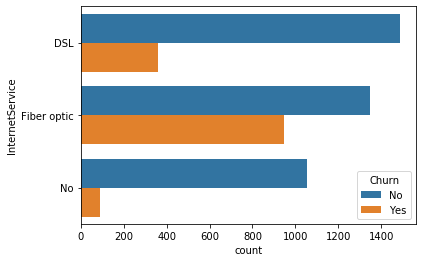

In [31]:
sns.countplot(y = 'InternetService', hue = 'Churn', data = training)

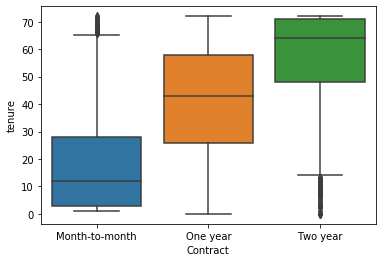

In [33]:
sns.boxplot(x = 'Contract', y = 'tenure', data = training)

In [5]:
# check out 0 tenure customers

print(len(training[training['tenure'] == 0]))

training[training['tenure'] == 0]

7


,Customer Number,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
989,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
1006,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1867,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
3081,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
3339,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No
4476,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
4923,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No


In [6]:
# string values in the TotalCharges column, 'empty' values have a space.
training.shape

(5282, 21)

In [9]:
# checking that all 'no internet service' customers have no internet service for all products.
training[training['InternetService'] == 'No']

,Customer Number,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,1074-WVEVG,Female,0,Yes,No,59,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.35,1267,No
14,9585-KKMFD,Male,0,Yes,Yes,41,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.00,879.8,No
15,2324-AALNO,Female,0,No,No,48,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),24.55,1203.95,No
17,6849-WLEYG,Male,0,No,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.75,19.75,Yes
24,3785-KTYSH,Male,0,No,No,53,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,24.60,1279,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5255,6549-YMFAW,Male,1,Yes,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,21.25,204.55,No
5260,5066-GFJMM,Female,0,Yes,No,3,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.90,45.75,No
5274,2266-FUBDZ,Male,0,Yes,Yes,15,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,278.85,No
5275,3097-PYWXL,Female,0,Yes,Yes,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.95,82.9,No


In [12]:
# drop the records where tenure = 0
training = training[training['tenure'] != 0]
training.shape

(5275, 21)

In [82]:
# check for null values
print(training.isnull().sum())

Customer Number     0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [13]:
def do_data(df, has_y = True, return_df = False):
    """
    Takes as input a dataframe of customer churn data and returns dataframe X and series y.
    Useful for repeatedly & consistently transforming & prepping data for modeling.
    All columns of dtype 'object' will be converted to categorical.
    
    Parameters
    ----------
    df : dataframe
    has_y : flag to indicate if df contains labeled churn outcome. default = True
    return_df : flag to have function return non-split dataframe. 
    
    Returns
    -------
    X : dataframe of input data
    y : series of labeled outcomes
    df : cleaned/transformed dataframe
    """
    
    df.columns = map(str.lower, df.columns) # all column headers to lower case
    

    df['totalcharges'] = df['totalcharges'].replace({" ": 0}) #replace 'space' missing values with 0
    df['totalcharges'] = df['totalcharges'].astype(float)
  
    df['calc_charges'] = df['tenure']*df['monthlycharges']

    # loop over df and convert all object dtype columns to categorical
    for i in df.columns:
        if df[i].dtype == object:
            df[i] = df[i].astype('category')
             
    df['seniorcitizen'] = df['seniorcitizen'].astype('category')

    # encode outcome and convert to int
    if return_df == False:
        if has_y == True: 
            X = df.drop(columns=['churn','customer number'])
            df['churn'] = df['churn'].map({'Yes':1, 'No':0}).astype(int)
            y = df['churn']
            return X, y
        else:
            X = df.drop(columns=['customer number'])
            return X
    else:
        return df

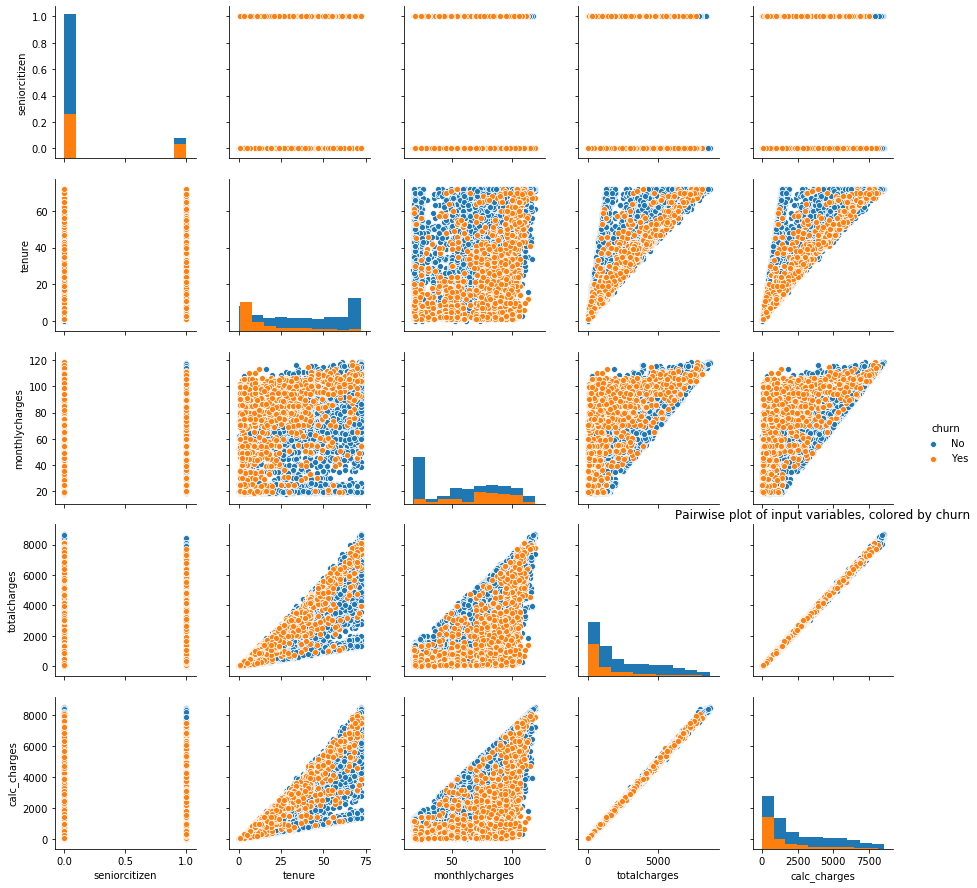

In [5]:
clean_training = do_data(training, has_y = True, return_df = True )
pairs = sns.pairplot(clean_training,
                     diag_kind = 'hist', 
                     hue = 'churn')
plt.title('Pairwise plot of input variables, colored by churn')
plt.show()

In [13]:
clean_training.dtypes


customer number     category
gender              category
seniorcitizen       category
partner             category
dependents          category
tenure                 int64
phoneservice        category
multiplelines       category
internetservice     category
onlinesecurity      category
onlinebackup        category
deviceprotection    category
techsupport         category
streamingtv         category
streamingmovies     category
contract            category
paperlessbilling    category
paymentmethod       category
monthlycharges       float64
totalcharges         float64
churn               category
dtype: object

In [14]:
# clean training data
X, y = do_data(training, has_y = True)

X.describe(include = 'all')

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,calc_charges
count,5275,5275.0,5275,5275,5275.000000,5275,5275,5275,5275,5275,5275,5275,5275,5275,5275,5275,5275,5275.000000,5275.000000,5275.000000
unique,2,2.0,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,NaN
top,Male,0.0,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,NaN
freq,2671,4444.0,2749,3682,NaN,4762,2569,2297,2622,2309,2314,2625,2140,2123,2913,3106,1782,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,32.180853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.538218,2257.547204,2257.348588
std,NaN,NaN,NaN,NaN,24.543876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.964948,2257.233894,2255.598289
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,18.800000
25%,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.550000,398.900000,393.775000
50%,NaN,NaN,NaN,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.200000,1375.400000,1369.200000
75%,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.750000,3729.750000,3732.800000


In [15]:
# encode input variabes; test-train split

encoder = ce.OneHotEncoder()  #One hot should be good for low cardinality categories.  Test others??
encoder.fit(X,y)
X = encoder.transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30,
                                                    random_state = 5)

In [42]:
"""
# encode input variabes w/ James Stein

encoder =ce.JamesSteinEncoder()
encoder.fit(X,y)
X = encoder.transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30,
                                                    random_state = 5)"""

In [ ]:
def top_score(score_dict):
    """
    Returns the key/index of the highest accuracy score in the scores dictionary.  Used in model testing 
    and less intensive parameter tuning.
    
    Paramaters
    ----------
    score_dict : dictionary of modeling scores.
    
    Returns
    -------
    index : key of the dictionary containing the highest training score. 
    """
    top_score = 0
    index = 0
    for key,values in score_dict.items():
        if values[-1] > top_score:        #last element of values array will always be the score
            top_score = values[-1]
            index = key
    return index

### Easy peasey modeling, looking for candidates.

In [46]:
# optimizing for auc
rf_accuracy_scores = {} 
iteration = 0
for i in range(2,11):
    for j in range(4,8):
        rf_model = ensemble.RandomForestClassifier(n_estimators = 100,
                                               max_depth = i,
                                               max_features = j)
        rf_model.fit(x_train, y_train)
        rf_proba = rf_model.predict_proba(x_test)
        rf_proba = rf_proba[:,1]
        score = roc_auc_score(y_test, rf_proba)    #AUC
        rf_accuracy_scores[iteration] = i,j,score
        iteration += 1

rf_accuracy_scores[top_score(rf_accuracy_scores)]

(4, 4, 0.8402933166259637)

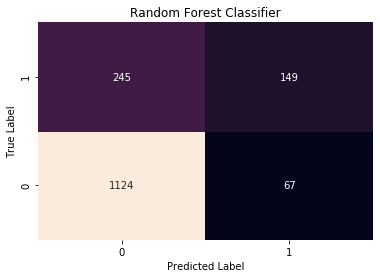

Accuracy Score 0.8031545741324921
AUC 0.8398074390415425
Precision score 0.6898148148148148
Recall score 0.37817258883248733


In [48]:
rf_model = ensemble.RandomForestClassifier(n_estimators = 100,
                                            max_depth = 4,
                                            max_features = 4)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
rf_proba = rf_model.predict_proba(x_test)
rf_proba = rf_proba[:,1]
rf_auc = roc_auc_score(y_test, rf_proba)
rf_score = rf_model.score(x_test,y_test)
rf_recall = recall_score(y_test, rf_pred)
rf_precision  = precision_score(y_test, rf_pred)
rf_result_mat = confusion_matrix(y_test,rf_pred)

sns.heatmap(rf_result_mat,
            # square = True,
            annot = True,
            fmt = 'd',
            cbar = False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Classifier')
plt.ylim(0,2)
plt.show()

print('Accuracy Score {}'.format(rf_score))
print('AUC {}'.format(rf_auc))
print('Precision score {}'.format(rf_precision))
print('Recall score {}'.format(rf_recall))

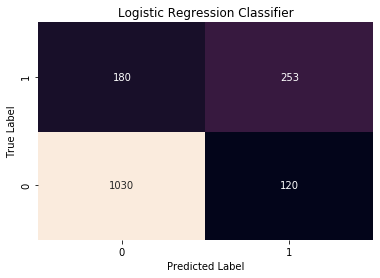

Accuracy Score 0.8104864181933038
AUC 0.8474937242695049
Precision score 0.67828418230563
Recall score 0.5842956120092379


In [61]:
"""important - need to verify distributions of input data."""
# logit
lr_model = linear_model.LogisticRegression(random_state = 0,
                                      #solver = 'sag',
                                    #multi_class = 'multinomial',
                                     max_iter = 500)
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)
lr_proba = lr_model.predict_proba(x_test)
lr_proba = lr_proba[:,1]
lr_auc = roc_auc_score(y_test, lr_proba)
lr_score = lr_model.score(x_test,y_test)
lr_recall = recall_score(y_test, lr_pred)
lr_precision  = precision_score(y_test, lr_pred)
lr_result_mat = confusion_matrix(y_test,lr_pred)

sns.heatmap(lr_result_mat,
            # square = True,
            annot = True,
            fmt = 'd',
            cbar = False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Classifier')
plt.ylim(0,2)
plt.show()

print('Accuracy Score {}'.format(lr_score))
print('AUC {}'.format(lr_auc))
print('Precision score {}'.format(lr_precision))
print('Recall score {}'.format(lr_recall))

In [159]:
# Linear SVM
svm_accuracy_scores = {}
iteration = 0
for i in [.01, .05, .1, .5, 1]:
    #for j in [.1]:
    svm_model = svm.SVC(C = i,
                        kernel = 'linear',
                        #degree = 3,
                        gamma = 'scale' ,
                        max_iter = 10000,
                        probability = True)
    svm_model.fit(x_train, y_train)
    svm_proba = svm_model.predict_proba(x_test)
    svm_proba = svm_proba[:,1]
    score = roc_auc_score(y_test, svm_proba)
    svm_accuracy_scores[iteration] = i,j,score
    iteration += 1

svm_accuracy_scores[top_score(svm_accuracy_scores)]

(0.01, 7, 0.7652625765639121)

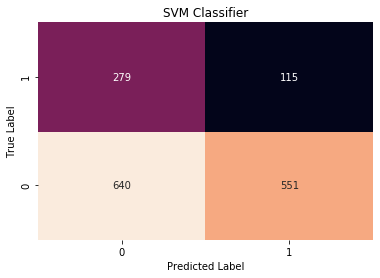

Accuracy Score 0.47634069400630913
AUC 0.3755727175474264


In [50]:
svm_model = svm.SVC(C = .01,
                   kernel = 'linear',
                   #degree = 2,
                   gamma = 'scale',
                   max_iter = 10000,
                   probability = True)

svm_model.fit(x_train, y_train)

svm_pred = svm_model.predict(x_test)
svm_score = svm_model.score(x_test, y_test)
svm_proba = svm_model.predict_proba(x_test)
svm_proba = svm_proba[:,1]
svm_auc = roc_auc_score(y_test, svm_proba)

svm_result_mat = confusion_matrix(y_test,svm_pred)

sns.heatmap(svm_result_mat,
            # square = True,
            annot = True,
            fmt = 'd',
            cbar = False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Classifier')
plt.ylim(0,2)
plt.show()

print('Accuracy Score {}'.format(svm_score))
print('AUC {}'.format(svm_auc))

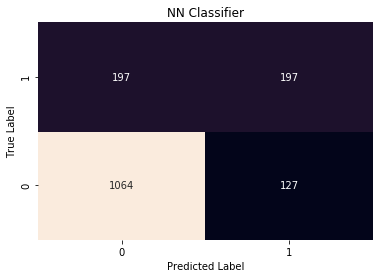

AUC 0.7797205777681171


In [51]:
nn = MLPClassifier(alpha = .0001,
                   solver = 'adam',
                   max_iter = 150
                  #warm_start = True
                  )

nn.fit(x_train, y_train)
nn_score = (x_test, y_test)
nn_pred = nn.predict(x_test)
nn_proba = nn.predict_proba(x_test)
nn_proba = nn_proba[:,1]
nn_auc = roc_auc_score(y_test, nn_proba)

nn_result_mat = confusion_matrix(y_test, nn_pred)

sns.heatmap(nn_result_mat,
            # square = True,
            annot = True,
            fmt = 'd',
            cbar = False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('NN Classifier')
plt.ylim(0,2)
plt.show()

#print('Accuracy Score {}'.format(nn_accuracy_scores[.0001]))
print('AUC {}'.format(nn_auc))

### More intense modeling

In [38]:
# test using all training data, no test split
X, y = do_data(training)
encoder = ce.OneHotEncoder() 
encoder.fit(X,y)
X = encoder.transform(X)

In [5]:
# grid search! for catboost encoding
# 1/29-changed scoring parameter in gridsearch to roc_auc

rf_grid = {'bootstrap':[True],
           'max_depth':[6,7,8,9],
           'max_features':[11,12,13,14,15,18,20],
           'min_samples_leaf':[5,6,7,8,9],
           'n_estimators':[100,200,400]}

rf_model = ensemble.RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf_model,
                           param_grid = rf_grid,
                           cv = 5,
                           scoring ='roc_auc',
                           n_jobs = -2,  #all but one thread
                           verbose = 2)
grid_search.fit(X, y)

grid_search.best_params_

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=-2)]: Done  31 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-2)]: Done 152 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-2)]: Done 355 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-2)]: Done 638 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-2)]: Done 1003 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-2)]: Done 1448 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-2)]: Done 1975 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-2)]: Done 2100 out of 2100 | elapsed: 14.1min finished


{'bootstrap': True,
 'max_depth': 7,
 'max_features': 20,
 'min_samples_leaf': 9,
 'n_estimators': 400}

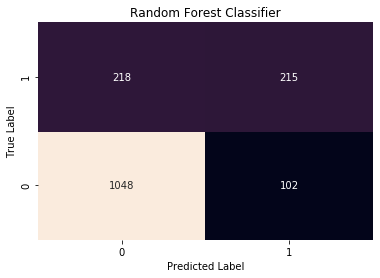

Accuracy Score 0.7978521794061908
AUC 0.8543126819961843
Precision score 0.6782334384858044
Recall score 0.49653579676674364


In [16]:
rf_model = ensemble.RandomForestClassifier(bootstrap = True,
                                           max_depth = 7,
                                           max_features = 13,
                                           min_samples_leaf = 7,
                                           n_estimators = 100)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
rf_proba = rf_model.predict_proba(x_test)
rf_proba = rf_proba[:,1]
rf_auc = roc_auc_score(y_test, rf_proba)
rf_score = rf_model.score(x_test,y_test)
rf_recall = recall_score(y_test, rf_pred)
rf_precision  = precision_score(y_test, rf_pred)
rf_result_mat = confusion_matrix(y_test,rf_pred)

sns.heatmap(rf_result_mat,
            # square = True,
            annot = True,
            fmt = 'd',
            cbar = False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Classifier')
plt.ylim(0,2)
plt.show()

print('Accuracy Score {}'.format(rf_score))
print('AUC {}'.format(rf_auc))
print('Precision score {}'.format(rf_precision))
print('Recall score {}'.format(rf_recall))

In [6]:
"""only for no-test split model"""
rf_model = ensemble.RandomForestClassifier(bootstrap = True,
                                           max_depth = 7,
                                           max_features = 20,
                                           min_samples_leaf = 9,
                                           n_estimators = 400)
rf_model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
# grid search! for catboost encoding
# 1/29-changed scoring parameter in gridsearch to roc_auc

nn_grid = {'hidden_layer_sizes':[(100,),(200,),(300,)],
           'activation':['relu','logistic'],
           'alpha':[.0001, .001, .01, .05, .5, 1],
           'solver':['adam','sgd','lbfgs'],
           'learning_rate':['constant', 'adaptive'],
           'max_iter':[200,400,600,800]}

nn_model = MLPClassifier()

grid_search = GridSearchCV(estimator = nn_model,
                           param_grid = nn_grid,
                           cv = 5,
                           scoring ='roc_auc',
                           n_jobs = -2,  #all but one thread
                           verbose = 2)
grid_search.fit(X, y)

grid_search.best_params_

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=-2)]: Done  31 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-2)]: Done 152 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-2)]: Done 355 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-2)]: Done 638 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-2)]: Done 1003 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-2)]: Done 1448 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-2)]: Done 1975 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-2)]: Done 2582 tasks      | elapsed: 45.7min
[Parallel(n_jobs=-2)]: Done 3271 tasks      | elapsed: 93.9min
[Parallel(n_jobs=-2)]: Done 4040 tasks      | elapsed: 133.9min
[Parallel(n_jobs=-2)]: Done 4320 out of 4320 | elapsed: 152.5min finished


{'activation': 'logistic',
 'alpha': 0.0001,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'max_iter': 800,
 'solver': 'adam'}

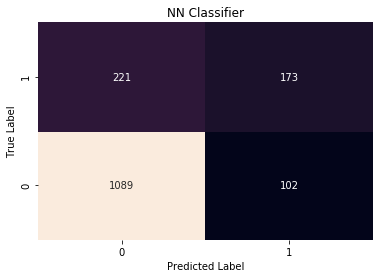

AUC 0.8291032148900169


In [28]:
nn = MLPClassifier(activation = 'logistic',
                   alpha = .00001,
                   solver = 'adam',
                   max_iter = 800,
                   hidden_layer_sizes = (100,),
                   learning_rate = 'constant'
                  #warm_start = True
                  )

nn.fit(x_train, y_train)
nn_score = (x_test, y_test)
nn_pred = nn.predict(x_test)
nn_proba = nn.predict_proba(x_test)
nn_proba = nn_proba[:,1]
nn_auc = roc_auc_score(y_test, nn_proba)

nn_result_mat = confusion_matrix(y_test, nn_pred)

sns.heatmap(nn_result_mat,
            # square = True,
            annot = True,
            fmt = 'd',
            cbar = False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('NN Classifier')
plt.ylim(0,2)
plt.show()

#print('Accuracy Score {}'.format(nn_accuracy_scores[.0001]))
print('AUC {}'.format(nn_auc))

In [39]:
# train nn on all training data
nn = MLPClassifier(activation = 'logistic',
                   alpha = .00001,
                   solver = 'adam',
                   max_iter = 800,
                   hidden_layer_sizes = (100,),
                   learning_rate = 'constant'
                  #warm_start = True
                  )

nn.fit(X, y)

MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=800, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

### Score the testing data

In [81]:
testing.shape

(1761, 21)

In [62]:
# score the testing data and export as .csv

Xt = do_data(testing, has_y = False)
Xt = encoder.transform(Xt)

scores = lr_model.predict_proba(Xt)[:,1]

final_scores = pd.DataFrame()
final_scores['Customer Number'] = testing.iloc[:,0]
final_scores['Churn'] = scores

#Exporting .csv 
now = datetime.now().strftime("%m/%d/%Y")

now = datetime.now().strftime('%m/%d/%Y-%H/%M')
filename = ('Waggoner_scores ' + str(now))
filename = filename.replace(" ", "_")
filename = filename.replace("/", "-")

print('exporting file ' + filename + '.csv...' )

final_scores.to_csv(filename + '.csv', header = True)


exporting file Waggoner_scores_02-01-2020-20-41.csv...


In [65]:
lr_scores = lr_model.predict_proba(Xt)[:,1]
nn_scores = nn.predict_proba(Xt)[:,1]
rf_scores = rf_model.predict_proba(Xt)[:,1]

""


In [76]:
scores_df = pd.DataFrame()
scores_df['lr'] = lr_scores
scores_df['nn'] = nn_scores
scores_df['rf'] = rf_scores

def get_mean(row):
    mean = np.mean(row)
    return mean

scores_df['Churn'] = scores_df.apply(get_mean, axis = 1)
scores_df['Customer Number'] = testing.iloc[:,0]

In [78]:
#Exporting .csv 
now = datetime.now().strftime("%m/%d/%Y")

now = datetime.now().strftime('%m/%d/%Y-%H/%M')
filename = ('Waggoner_scores ' + str(now))
filename = filename.replace(" ", "_")
filename = filename.replace("/", "-")

print('exporting file ' + filename + '.csv...' )

scores_df.to_csv(filename + '.csv', header = True)

exporting file Waggoner_scores_02-01-2020-20-51.csv...


XGBOOST

In [106]:
model = XGBClassifier()

# from XGBoost example, investigate more
parameters = { 
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

grid_search = GridSearchCV(model,
                    parameters, 
                    n_jobs= -2,
                    scoring= 'roc_auc',
                    cv = 3,
                    verbose = 2)
grid_search.fit(X, y)

grid_search.best_params_

Fitting 3 folds for each of 3840 candidates, totalling 11520 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=-2)]: Done  31 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-2)]: Done 152 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-2)]: Done 355 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-2)]: Done 638 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-2)]: Done 1003 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-2)]: Done 1448 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-2)]: Done 1975 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-2)]: Done 2582 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-2)]: Done 3271 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-2)]: Done 4040 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-2)]: Done 4891 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-2)]: Done 5822 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-2)]: Done 6835 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-2)]: Done 7928 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-2)]: Done 9103 tasks      | 

{'colsample_bytree': 0.4,
 'eta': 0.05,
 'gamma': 0.1,
 'max_depth': 3,
 'min_child_weight': 1}

In [108]:
model = XGBClassifier(colsample_bytree = 0.4,
                      eta = 0.05,
                      gamma = 0.1,
                      max_depth = 3,
                      min_child_weight = 1)
model.fit(x_train, y_train)

pred = model.predict_proba(x_test)
xgb_pred = pred[:,1]
xgb_auc = roc_auc_score(y_test, xgb_pred)
#predictions = [round(value) for value in pred]

"""accuracy = accuracy_score(y_test, pred)

xgb_result_mat = confusion_matrix(y_test, pred)

sns.heatmap(xgb_result_mat,
            # square = True,
            annot = True,
            fmt = 'd',
            cbar = False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('XGB Classifier')
plt.ylim(0,2)
plt.show()
"""
print('AUC Score {}'.format(xgb_auc))

AUC Score 0.8546821970077316


In [111]:
len(xgb_pred)

1583

In [114]:
Xt = do_data(testing, has_y = False)
Xt = encoder.transform(Xt)

scores = model.predict_proba(Xt)[:,1]
final_scores = pd.DataFrame()
final_scores['Customer Number'] = testing.iloc[:,0]
final_scores['Churn'] = scores

#Exporting .csv 
now = datetime.now().strftime("%m/%d/%Y")

now = datetime.now().strftime('%m/%d/%Y-%H/%M')
filename = ('Waggoner_scores ' + str(now))
filename = filename.replace(" ", "_")
filename = filename.replace("/", "-")

print('exporting file ' + filename + '.csv...' )

final_scores.to_csv(filename + '.csv', header = True)


exporting file Waggoner_scores_02-01-2020-22-31.csv...


Feature ranking:
1. feature 35 (0.203419)
2. feature 8 (0.122610)
3. feature 46 (0.085886)
4. feature 45 (0.079203)
5. feature 44 (0.077145)
6. feature 26 (0.062888)
7. feature 17 (0.059453)
8. feature 42 (0.056319)
9. feature 15 (0.050421)
10. feature 37 (0.019519)
11. feature 14 (0.015717)
12. feature 20 (0.012255)
13. feature 23 (0.009513)
14. feature 38 (0.008125)
15. feature 19 (0.008063)
16. feature 29 (0.008014)
17. feature 36 (0.007901)
18. feature 34 (0.007518)
19. feature 32 (0.006878)
20. feature 31 (0.006270)
21. feature 28 (0.006183)
22. feature 11 (0.006069)
23. feature 39 (0.005419)
24. feature 13 (0.005045)
25. feature 18 (0.004817)
26. feature 0 (0.004511)
27. feature 24 (0.004425)
28. feature 1 (0.004177)
29. feature 3 (0.004054)
30. feature 22 (0.003951)
31. feature 7 (0.003802)
32. feature 2 (0.003769)
33. feature 4 (0.003505)
34. feature 43 (0.003495)
35. feature 6 (0.003119)
36. feature 21 (0.003110)
37. feature 5 (0.003109)
38. feature 27 (0.003070)
39. feature 4

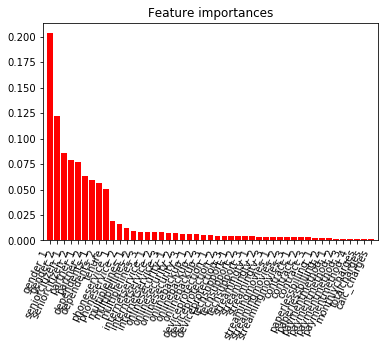

In [24]:
#plot feature importances

feature_names = list(x_train.columns)
importances = rf_model.feature_importances_
std = np.std([rf_model.feature_importances_])

indices = np.argsort(importances)[::-1]
#index_names = [feature_names[x_train] for x in indices] # align column names with indicies

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r",
       #yerr=std[indices],
       align="center")
plt.xticks(range(x_train.shape[1]), feature_names, rotation = 65, ha = 'right')
plt.xlim([-1, x_train.shape[1]])
plt.show()
